In [2]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as  plt
rng = numpy.random

/home/dath/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [3]:
learning_rate = 0.01
training_epochs = 1000
display_step = 50


In [4]:
# Training Data
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

In [5]:
X = tf.placeholder("float")
Y = tf.placeholder("float")
W = tf.Variable(rng.rand(),name= "weight")
b = tf.Variable(rng.randn(),name = "bias")


In [6]:
pred = tf.add(tf.multiply(X,W),b)


In [7]:
cost = tf.reduce_sum(tf.pow(pred-Y,2))/(2*n_samples)
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)


In [8]:
init = tf.global_variables_initializer()

Epoch: 0050 cost= 0.316444397 W= 0.523102 b= -1.16613
Epoch: 0100 cost= 0.288786203 W= 0.506835 b= -1.04911
Epoch: 0150 cost= 0.264321089 W= 0.491536 b= -0.93905
Epoch: 0200 cost= 0.242680714 W= 0.477147 b= -0.835534
Epoch: 0250 cost= 0.223539218 W= 0.463613 b= -0.738174
Epoch: 0300 cost= 0.206607893 W= 0.450884 b= -0.646605
Epoch: 0350 cost= 0.191631585 W= 0.438913 b= -0.56048
Epoch: 0400 cost= 0.178384885 W= 0.427653 b= -0.479479
Epoch: 0450 cost= 0.166667938 W= 0.417063 b= -0.403296
Epoch: 0500 cost= 0.156304166 W= 0.407103 b= -0.331643
Epoch: 0550 cost= 0.147137284 W= 0.397735 b= -0.264252
Epoch: 0600 cost= 0.139029145 W= 0.388924 b= -0.200868
Epoch: 0650 cost= 0.131857529 W= 0.380638 b= -0.141255
Epoch: 0700 cost= 0.125514299 W= 0.372844 b= -0.0851868
Epoch: 0750 cost= 0.119903833 W= 0.365514 b= -0.0324535
Epoch: 0800 cost= 0.114941455 W= 0.358619 b= 0.0171438
Epoch: 0850 cost= 0.110552378 W= 0.352135 b= 0.0637912
Epoch: 0900 cost= 0.106670402 W= 0.346036 b= 0.107664
Epoch: 0950 c

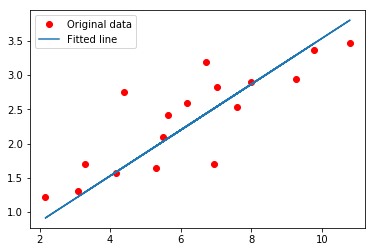

In [10]:
with tf.Session() as sess:
    sess.run(init)
    for epoch in  range(training_epochs):
        for (x,y) in  zip(train_X,train_Y):
            sess.run(optimizer,feed_dict= {X:x,Y:y})
        if (epoch + 1) % display_step ==0:
            c = sess.run(cost,feed_dict = {X:train_X, Y:train_Y})
            print("Epoch:",'%04d'%(epoch+1),"cost=", "{:.9f}".format(c),"W=",sess.run(W),"b=",sess.run(b))
    print("Optimization Finished")
    training_cost = sess.run(cost,feed_dict = {X:train_X,Y:train_Y})
    print("Training cost = ", training_cost, "W =", sess.run(W),"b=",sess.run(b),'\n')
    plt.plot(train_X,train_Y,'ro',label= 'Original data')
    plt.plot(train_X,sess.run(W)*train_X + sess.run(b), label = "Fitted line")
    plt.legend()
    plt.show()

In [ ]:
{}